# Double pendulum using Lagrange's equation

Defines a LagrangianDPendulum class that generates basic pendulum plots, an animation, and studies of the chaotic nature of the system. 

* Last revised 17-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).
* Last revised 20-Apr-2022 by Leo Deer (deer.279@osu.edu).

## Equations of Motion 

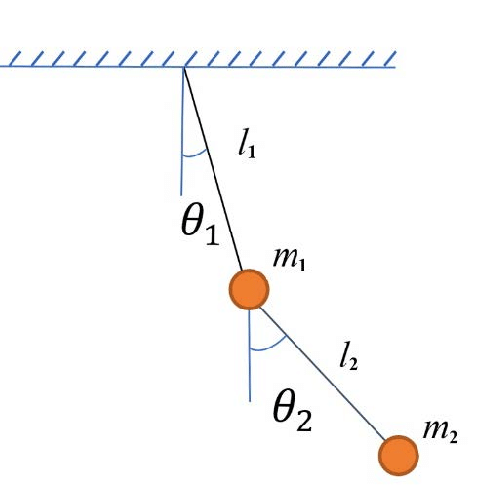

For this double pendulum, we will use the Lagrangian formulation with generalized coordinates $\theta_1$ & $\theta_2$. We obtain the lagragian,

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2) l_1^2 \dot\theta_1^2  + \frac12 m_2 l_2^2 \dot\theta_2^2 + m_2 l_1 l_2 \cos(\theta_1 - \theta_2) \dot\theta_1 \dot\theta_2 + g (m_1 + m_2) l_1 \cos(\theta_1) + g m_2 l_2 \cos(\theta_2)
\end{align}$

We apply the euler lagrange equations for $\theta_1$ & $\theta_2$ and obtain,

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_1} = \frac{\partial\mathcal L}{\partial\theta_1}
 \quad\Longrightarrow\quad
 -g (m_1 + m_2) \sin\theta_1 = (m_1 + m_2) l_1 \ddot\theta_1 + m_2 l_2 \sin(\theta_1 - \theta_2) \dot\theta_2^2 + m_2 l_2 \cos(\theta_1 - \theta_2) \ddot\theta_2
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_2} = \frac{\partial\mathcal L}{\partial\theta_2}
 \quad\Longrightarrow\quad
 -g \sin\theta_2 = l_2 \ddot\theta_2 + l_1 \sin(\theta_2 - \theta_1) \dot\theta_1^2 + l_1 \cos(\theta_2 - \theta_1) \ddot\theta_1
    \;.
\end{align}$

From these we may solve for $\ddot\theta_1$ & $\ddot\theta_2$ to find our equations of motion
$\begin{align}
 \ddot\theta_1 = \frac{g m_2 \cos(\theta_1 - \theta_2) \sin\theta_2 - m_2 l_1 \cos(\theta_1 - \theta_2) \sin(\theta_1 - \theta_2) \dot\theta_1^2 - m_2 l_2 \sin(\theta_1 - \theta_2) \dot\theta_2^2 - g (m_1 + m_2) \sin\theta_1}{(m_1 + m_2) l_1 - m_2 l_1 \cos(\theta_1 - \theta_2)^2}
\end{align}$

$\begin{align}
 \ddot\theta_2 = \frac{g (m_1 + m_2) \cos(\theta_2 - \theta_1) \sin\theta_1 - m_2 l_2 \cos(\theta_2 - \theta_1) \sin(\theta_2 - \theta_1) \dot\theta_2^2 - (m_1 + m_2) l_1 \sin(\theta_2 - \theta_1) \dot\theta_1^2 - g (m_1 + m_2) \sin\theta_2}{(m_1 + m_2) l_2 - m_2 l_2 \cos(\theta_2 - \theta_1)^2}
\end{align}$

These are two coupled $2^{nd}$ order equations, but we may rewrite them as $4$ $1^{st}$ order equations by introducing $\omega_1 = \dot\theta_1$ & $\omega_2 = \dot\theta_2$ which gives

$\begin{align}
 \dot\omega_1 = \frac{g m_2 \cos(\theta_1 - \theta_2) \sin\theta_2 - m_2 l_1 \cos(\theta_1 - \theta_2) \sin(\theta_1 - \theta_2) \omega_1^2 - m_2 l_2 \sin(\theta_1 - \theta_2) \omega_2^2 - g (m_1 + m_2) \sin\theta_1}{(m_1 + m_2) l_1 - m_2 l_1 \cos(\theta_1 - \theta_2)^2}
\end{align}$

$\begin{align}
 \dot\theta_1 = \omega_1
\end{align}$

$\begin{align}
 \dot\omega_2 = \frac{g (m_1 + m_2) \cos(\theta_2 - \theta_1) \sin\theta_1 - m_2 l_2 \cos(\theta_2 - \theta_1) \sin(\theta_2 - \theta_1) \omega_2^2 - (m_1 + m_2) l_1 \sin(\theta_2 - \theta_1) \omega_1^2 - g (m_1 + m_2) \sin\theta_2}{(m_1 + m_2) l_2 - m_2 l_2 \cos(\theta_2 - \theta_1)^2}
\end{align}$

$\begin{align}
 \dot\theta_2 = \omega_2
\end{align}$

These are what we shall solve.

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Double pendulum class and utility functions

In [ ]:
class LagrangianDPendulum():
    """
    Double Pendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
         length of the first pendulum
    L2 : float
         length of the second pendulum
    m1 : float
         mass of the first pendulum
    m2 : float
         mass of the second pendulum
    g : float
        gravitational acceleration at the earth's surface

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    
    solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
        Solves the differential equations for theta1 and theta2 given the
        initial conditions     
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1/dt d^2theta1/dt^2
         dtheta2/dt d^2theta2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = theta1(t) and y[1] = dtheta1/dt
                                      y[2] = theta2(t) and y[3] = dtheta2/dt
            
        Returns
        -------
        
        """
        c = np.cos(y[0]-y[2])
        s = np.sin(y[2]-y[0])
        denom = ((self.m1 + self.m2) - self.m2 * ((c)**2))
        theta1, theta1_dot, theta2, theta2_dot = y
        
        return [y[1], (self.m2 * self.L1 * c * s * (theta1_dot**2) \
                       + self.m2 * self.L2 * s * (theta2_dot**2) \
                       - self.g * (self.m1 + self.m2) * np.sin(theta1) \
                       + self.g * self.m2 * c * np.sin(theta2))/ \
                    (self.L1 * denom), 
                y[3], (self.g * (self.m1 + self.m2) * c * np.sin(theta1) \
                       - self.m2 * self.L2 * c * s * (theta2_dot**2) \
                       - (self.m1 + self.m2) * self.L1 * s * (theta1_dot**2) \
                       - self.g * (self.m1 + self.m2) * np.sin(theta2))/ \
                    (self.L2 * denom)]
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
    
        return theta1, theta1_dot, theta2, theta2_dot

In [ ]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [ ]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Small Angle Normal Modes

Here we will start by plotting and animating the small angle cases to obtain 
the normal mode solutions outlined in Taylor Section 11.4

### $\theta(t)$ plots

In [ ]:
# Labels for individual plot axes
theta1_vs_time_labels = (r'$t$', r'$\theta_1(t)$')
theta2_vs_time_labels = (r'$t$', r'$\theta_2(t)$')
theta1_dot_vs_time_labels = (r'$t$', r'$d\theta_1/dt(t)$')
theta2_dot_vs_time_labels = (r'$t$', r'$d\theta_2/dt(t)$')
state_space1_labels = (r'$\theta_1$', r'$d\theta_1/dt$')
state_space2_labels = (r'$\theta_2$', r'$d\theta_2/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500. #largest time value of simulation
t_stop = 100. #largest time value on plots
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
pSA = LagrangianDPendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)

In [ ]:
# Inital Conditions
theta1_0_SA = 1./3.
theta2_0_SA1 = np.sqrt(2)/3.
theta2_0_SA2 = -np.sqrt(2)/3.
theta1_dot_0_SA = 0.
theta2_dot_0_SA = 0.

theta1_SA1, theta1_dot_SA1, theta2_SA1, theta2_dot_SA1 = \
pSA.solve_ode(t_pts, theta1_0_SA, theta1_dot_0_SA, theta2_0_SA1, theta2_dot_0_SA)

theta1_SA2, theta1_dot_SA2, theta2_SA2, theta2_dot_SA2 = \
pSA.solve_ode(t_pts, theta1_0_SA, theta1_dot_0_SA, theta2_0_SA2, theta2_dot_0_SA)

In [ ]:
# start the plot!
fig_SA1 = plt.figure(figsize=(15,5))
overall_title_SA1 = 'Normal Mode 1:  ' + \
                rf'  $\theta_1(0) = {theta1_0_SA:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0_SA:.2f}$' + \
                rf'  $\theta_2(0) = {theta2_0_SA1:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0_SA:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_SA1.suptitle(overall_title_SA1, va='baseline')

fig_SA2 = plt.figure(figsize=(15,5))
overall_title_SA2 = 'Normal Mode 2:  ' + \
                rf'  $\theta_1(0) = {theta1_0_SA:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0_SA:.2f}$' + \
                rf'  $\theta_2(0) = {theta2_0_SA2:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0_SA:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_SA2.suptitle(overall_title_SA2, va='baseline')
    
# first plot: theta1 plot 
ax_a = fig_SA1.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta1_SA1[start : stop], 
            axis_labels=theta1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\theta_1(t)$', 
            ax=ax_a)    
                              
# second plot: theta2 plot                 
ax_b = fig_SA1.add_subplot(2,1,2) 

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta2_SA1[start : stop], 
            axis_labels=theta2_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\theta_2(t)$', 
            ax=ax_b)    

ax_c = fig_SA2.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta1_SA2[start : stop], 
            axis_labels=theta1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\theta_1(t)$', 
            ax=ax_c)    
                              
# second plot: theta2 plot   
ax_d = fig_SA2.add_subplot(2,1,2)

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta2_SA2[start : stop], 
            axis_labels=theta2_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\theta_2(t)$', 
            ax=ax_d)   

fig_SA1.tight_layout()
fig_SA2.tight_layout()
#fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

Here we see two modes where both pendulums oscillate at the same frequency. Next we will look at animations of these two modes

### Normal Mode 1 animation

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def coordinates(x0,y0,L,theta):
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x,y

In [ ]:
%%capture

xmin = -1.5
xmax = -xmin
ymin = xmin
ymax = -xmin

animated_pendulums_SA1 = plt.figure(figsize=(12,5), num = 'Double pendulum')
ax_anim_SA1 = animated_pendulums_SA1.add_subplot(1,1,1)
ax_anim_SA1.set_xlim(xmin,xmax)
ax_anim_SA1.set_ylim(ymin,ymax)

x0, y0 = 0., 1.

Origin_anim_SA1, = ax_anim_SA1.plot(x0, y0, 'o', markersize=6, color='blue') 
x1_SA1, y1_SA1 = coordinates(x0, y0, pSA.L1, theta1_SA1[0])
Bob1_anim_SA1, = ax_anim_SA1.plot(x1_SA1, y1_SA1, 'o', markersize=8, color='blue')
Pend1_anim_SA1, = ax_anim_SA1.plot([x0, x1_SA1], [y0, y1_SA1], color='blue', lw=3)
x2_SA1, y2_SA1 = coordinates(x1_SA1, y1_SA1, pSA.L2, theta2_SA1[0])
Bob2_anim_SA1, = ax_anim_SA1.plot(x2_SA1, y2_SA1, 'o', markersize=8, color='blue')
Pend2_anim_SA1, = ax_anim_SA1.plot([x1_SA1, x2_SA1], [y1_SA1, y2_SA1], color='blue', lw=3)


ax_anim_SA1.set_aspect(1)
ax_anim_SA1.axis('off')
animated_pendulums_SA1.tight_layout()

In [ ]:
def animate_pendulums_SA1(i):
    """
    This funciotn creates the ith animated frame in the objects trajectory.
    """
    
    i_skip = 2 * i
    
    x0, y0 = 0., 1.
    Origin_anim_SA1.set_data(x0, y0) 

    x1_SA1, y1_SA1 = coordinates(x0, y0, pSA.L1, theta1_SA1[i_skip])
    Bob1_anim_SA1.set_data(x1_SA1, y1_SA1)
    Pend1_anim_SA1.set_data([x0, x1_SA1], [y0, y1_SA1])
    x2_SA1, y2_SA1 = coordinates(x1_SA1, y1_SA1, pSA.L2, theta2_SA1[i_skip])
    Bob2_anim_SA1.set_data(x2_SA1, y2_SA1)
    Pend2_anim_SA1.set_data([x1_SA1, x2_SA1], [y1_SA1, y2_SA1])

    
    return (Origin_anim_SA1, Bob1_anim_SA1, Pend1_anim_SA1, Bob2_anim_SA1, Pend2_anim_SA1)

In [ ]:
frame_interval = 20.
frame_num = 101

anim_SA1 = animation.FuncAnimation(animated_pendulums_SA1,
                              animate_pendulums_SA1,
                              init_func=None,
                              frames = frame_num,
                              interval = frame_interval,
                              blit = True,
                              repeat=False)

In [ ]:
HTML(anim_SA1.to_jshtml())

### Normal Mode 2 animation

In [ ]:
%%capture

xmin = -1.5
xmax = -xmin
ymin = xmin
ymax = -xmin

animated_pendulums_SA2 = plt.figure(figsize=(12,5), num = 'Double pendulum')
ax_anim_SA2 = animated_pendulums_SA2.add_subplot(1,1,1)
ax_anim_SA2.set_xlim(xmin,xmax)
ax_anim_SA2.set_ylim(ymin,ymax)

x0, y0 = 0., 1.

Origin_anim_SA2, = ax_anim_SA2.plot(x0, y0, 'o', markersize=6, color='red') 
x1_SA2, y1_SA2 = coordinates(x0, y0, pSA.L1, theta1_SA2[0])
Bob1_anim_SA2, = ax_anim_SA2.plot(x1_SA2, y1_SA2, 'o', markersize=8, color='red')
Pend1_anim_SA2, = ax_anim_SA2.plot([x0, x1_SA2], [y0, y1_SA2], color='red', lw=3)
x2_SA2, y2_SA2 = coordinates(x1_SA2, y1_SA2, pSA.L2, theta2_SA2[0])
Bob2_anim_SA2, = ax_anim_SA2.plot(x2_SA2, y2_SA2, 'o', markersize=8, color='red')
Pend2_anim_SA2, = ax_anim_SA2.plot([x1_SA2, x2_SA2], [y1_SA2, y2_SA2], color='red', lw=3)

ax_anim_SA2.set_aspect(1)
ax_anim_SA2.axis('off')
animated_pendulums_SA2.tight_layout()

In [ ]:
def animate_pendulums_SA2(i):
    """
    This funciotn creates the ith animated frame in the objects trajectory.
    """
    
    i_skip = 2 * i
    
    x0, y0 = 0., 1.
    Origin_anim_SA2.set_data(x0, y0) 

    x1_SA2, y1_SA2 = coordinates(x0, y0, pSA.L1, theta1_SA2[i_skip])
    Bob1_anim_SA2.set_data(x1_SA2, y1_SA2)
    Pend1_anim_SA2.set_data([x0, x1_SA2], [y0, y1_SA2])
    x2_SA2, y2_SA2 = coordinates(x1_SA2, y1_SA2, pSA.L2, theta2_SA2[i_skip])
    Bob2_anim_SA2.set_data(x2_SA2, y2_SA2)
    Pend2_anim_SA2.set_data([x1_SA2, x2_SA2], [y1_SA2, y2_SA2])

    
    return (Origin_anim_SA2, Bob1_anim_SA2, Pend1_anim_SA2, Bob2_anim_SA2, Pend2_anim_SA2)

In [ ]:
frame_interval = 20.
frame_num = 101

anim_SA2 = animation.FuncAnimation(animated_pendulums_SA2,
                              animate_pendulums_SA2,
                              init_func=None,
                              frames = frame_num,
                              interval = frame_interval,
                              blit = True,
                              repeat=False)

In [ ]:
HTML(anim_SA2.to_jshtml())

## Chaotic Motion

Here we will outline the chaotic nature of the double pendulum which occur when the initial conditions are larger than the small angle approximation. Two do this we will study two pendulums with inital conditions that deviate by very small amounts.

### $\theta(t)$ plots

In [ ]:
# Labels for individual plot axes
theta1_vs_time_labels = (r'$t$', r'$\theta_1(t)$')
theta2_vs_time_labels = (r'$t$', r'$\theta_2(t)$')
theta1_dot_vs_time_labels = (r'$t$', r'$d\theta_1/dt(t)$')
theta2_dot_vs_time_labels = (r'$t$', r'$d\theta_2/dt(t)$')
state_space1_labels = (r'$\theta_1$', r'$d\theta_1/dt$')
state_space2_labels = (r'$\theta_2$', r'$d\theta_2/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500. #largest time value of simulation
t_stop = 50. #largest time value on plots
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianDPendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)


In [ ]:
# both plots: same initial conditions
theta1_0 = np.pi/2.
theta2_0 = np.pi
theta1_dot_0 = 0.
theta2_dot_0 = 0.

#Solve for the motion of pendulum 1 with the above initial conditions
theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Solve for the motion of pendulum 2 a theta1_0 value that differs from 
# the first by 0.0001
theta1c, theta1c_dot, theta2c, theta2c_dot = p1.solve_ode(t_pts, theta1_0 + 0.0001, theta1_dot_0, theta2_0, theta2_dot_0)

In [ ]:
# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Chaotic Double pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f}$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta1 plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\theta_1(t)$', 
            ax=ax_a)  

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta1c[start : stop], 
            axis_labels=theta1_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
  

ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta2_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\theta_2(t)$', 
            ax=ax_b)   
                              
# second plot: theta2 plot                 

start, stop = start_stop_indices(t_pts, t_start, t_stop)    
plot_y_vs_x(t_pts[start : stop], theta2c[start : stop], 
            axis_labels=theta2_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\theta_2(t)$', 
            ax=ax_b)   

fig.tight_layout()
#fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

Here we see that while the two pendulums move together for the first ~20 time units of their motion, they do split sensitivity to inital conditions.

### Animation

Next we will animate the motion of the two pendulums

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def coordinates(x0,y0,L,theta):
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x,y

In [ ]:
%%capture

xmin = -(p1.L1 + p1.L2 + 0.1)
xmax = -xmin
ymin = xmin
ymax = -xmin

animated_pendulums = plt.figure(figsize=(12,5), num = 'Double pendulum')
ax_anim = animated_pendulums.add_subplot(1,1,1)
ax_anim.set_xlim(xmin,xmax)
ax_anim.set_ylim(ymin,ymax)

x0, y0 = 0., 0.
Origin_anim, = ax_anim.plot(x0, y0, 'o', markersize=6, color='blue') 

x1, y1 = coordinates(x0, y0, p1.L1, theta1[0])
Bob1_anim, = ax_anim.plot(x1, y1, 'o', markersize=8, color='blue')
Pend1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)
x2, y2 = coordinates(x1, y1, p1.L2, theta2[0])
Bob2_anim, = ax_anim.plot(x2, y2, 'o', markersize=8, color='blue')
Pend2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)


x1c, y1c = coordinates(x0, y0, p1.L1, theta1c[0])
Bob1_anim_c, = ax_anim.plot(x1c, y1c, 'o', markersize=8, color='red')
Pend1_anim_c, = ax_anim.plot([x0, x1c], [y0, y1c], color='red', lw=3)
x2c, y2c = coordinates(x1c, y1c, p1.L2, theta2c[0])
Bob2_anim_c, = ax_anim.plot(x2c, y2c, 'o', markersize=8, color='red')
Pend2_anim_c, = ax_anim.plot([x1c, x2c], [y1c, y2c], color='red', lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('off')
animated_pendulums.tight_layout()

In [ ]:
def animate_pendulums(i):
    """
    This funciotn creates the ith animated frame in the objects trajectory.
    """
    
    i_skip = 2 * i
    
    x0, y0 = 0., 0.
    Origin_anim.set_data(x0, y0) 

    x1, y1 = coordinates(x0, y0, p1.L1, theta1[i_skip])
    Bob1_anim.set_data(x1, y1)
    Pend1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = coordinates(x1, y1, p1.L2, theta2[i_skip])
    Bob2_anim.set_data(x2, y2)
    Pend2_anim.set_data([x1, x2], [y1, y2])

    x1c, y1c = coordinates(x0, y0, p1.L1, theta1c[i_skip])
    Bob1_anim_c.set_data(x1c, y1c)
    Pend1_anim_c.set_data([x0, x1c], [y0, y1c])
    x2c, y2c = coordinates(x1c, y1c, p1.L2, theta2c[i_skip])
    Bob2_anim_c.set_data(x2c, y2c)
    Pend2_anim_c.set_data([x1c, x2c], [y1c, y2c])

    
    return (Origin_anim, Bob1_anim, Pend1_anim, Bob2_anim, Pend2_anim,
            Bob1_anim_c, Pend1_anim_c, Bob2_anim_c, Pend2_anim_c)

In [ ]:
frame_interval = 24.
frame_num = 1001

anim = animation.FuncAnimation(animated_pendulums,
                              animate_pendulums,
                              init_func=None,
                              frames = frame_num,
                              interval = frame_interval,
                              blit = True,
                              repeat=False)

In [ ]:
HTML(anim.to_jshtml())

## Investigations into Chaos

While the sensitivity to initial conditions was evidence that this system is chaotic, we want to show this with more than one way,

### Power Spectrum

We will look at the power spectrum of $\theta_1$ & $\theta_2$ from one of the above double pendulums

In [ ]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal1 = theta1[start:stop]
power_spectrum1 = np.abs(np.fft.fft(signal1))**2
freqs1 = 2.*np.pi * np.fft.fftfreq(signal1.size, delta_t)
idx1 = np.argsort(freqs1)

signal2 = theta2[start:stop]
power_spectrum2 = np.abs(np.fft.fft(signal2))**2
freqs2 = 2.*np.pi * np.fft.fftfreq(signal2.size, delta_t)
idx2 = np.argsort(freqs2)

fig_ps1 = plt.figure(figsize=(5,5))
ax_ps1 = fig_ps1.add_subplot(1,1,1)
ax_ps1.semilogy(freqs1[idx1], power_spectrum1[idx1], color='blue')
ax_ps1.set_xlim(0, 30.)
ax_ps1.set_ylim(1.e1, 1.e7)
ax_ps1.set_xlabel('frequency (Hz)')
ax_ps1.set_title('Power Spectrum for' + rf' $\theta_1$')

fig_ps2 = plt.figure(figsize=(5,5))
ax_ps2 = fig_ps2.add_subplot(1,1,1)
ax_ps2.semilogy(freqs2[idx2], power_spectrum2[idx2], color='blue')
ax_ps2.set_xlim(0, 30.)
ax_ps2.set_ylim(1.e2, 1.e7)
ax_ps2.set_xlabel('frequency (Hz)')
ax_ps2.set_title('Power Spectrum for' + rf' $\theta_2$')

#fig_ps.tight_layout()

We see that both angles have a continuous power spectrum which is a marker of chaotic motion

### $\Delta\theta$ Plots

Here we will look at the difference in the angles ($\theta_1$ & $\theta_2$) between the two pendulums and see how the vary with time.

In [ ]:
# Calculate the absolute difference in theta1
Delta_theta1 = np.fabs(theta1c - theta1)

# Calculate the absolute difference in theta2
Delta_theta2 = np.fabs(theta2c - theta2)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = rf' $\Delta\theta$ plots'
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,2,1)                  

start, stop = start_stop_indices(t_pts, 0., 50.)
ax_a.semilogy(t_pts[start : stop], Delta_theta1[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\theta_1|$')

ax_b = fig.add_subplot(2,2,2)                  

start, stop = start_stop_indices(t_pts, 0., 50.)
plot_y_vs_x(t_pts[start : stop], Delta_theta2[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\theta_2|$')

ax_c = fig.add_subplot(2,2,3)                  

start, stop = start_stop_indices(t_pts, 0., 500.)
ax_c.semilogy(t_pts[start : stop], Delta_theta1[start : stop], 
            color='blue', label=None)    
ax_c.set_xlabel('t')
ax_c.set_ylabel(r'$|\Delta\theta_1|$')

ax_d = fig.add_subplot(2,2,4)                  

start, stop = start_stop_indices(t_pts, 0., 500.)
plot_y_vs_x(t_pts[start : stop], Delta_theta2[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_d.set_xlabel('t')
ax_d.set_ylabel(r'$|\Delta\theta_2|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
#fig.savefig('figure_12.11.png', bbox_inches='tight')  

We see that both $\Delta\theta_1$ and $\Delta\theta_2$ grow linearly on this semilog plot. This indicates that $\Delta\theta_1$ and $\Delta\theta_2$ both have a positive Lyopunov exponent, a characteristic of chaos. 

When we extend these plots out to large t we do find that the $|\Delta\theta|$ seem to plateau. This is not because of lack of chaos but instead because of nature of the pendulums themselves not really being able to grow beyond $\mathcal{O}(10^1)$